<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

A small neural network to program from memory when I get bored or want some instant practice.

In [48]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import numpy as np
import tensorflow as tf
import os
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split

In [50]:
# Load data
boston = load_boston()

In [51]:
# Assign data
data = boston['data']
label = boston['target']

print(data.shape)
print(label.shape)

(506, 13)
(506,)


In [52]:
# Feature standardization and label reshape
dataS = StandardScaler().fit_transform(data)
label = np.reshape(label, (label.shape[0], 1))

print(dataS.shape)
print(label.shape)

(506, 13)
(506, 1)


In [53]:
# Add bias unit

dataB = np.hstack(( np.ones((dataS.shape[0], 1)), dataS ))

In [54]:
# Create test/train split
testSize = 0.2
seed = 10
xTrain, xTest, yTrain, yTest = train_test_split(dataB, label, test_size = testSize, random_state = seed)

print(xTrain.shape)
print(yTrain.shape)

(404, 14)
(404, 1)


In [55]:
# Assign some other vars
rows, cols = xTrain.shape
lr = 0.01
epochs = 501

In [56]:
# Build TF CG

# placeholders
x = tf.placeholder(dtype = tf.float32, shape = [None, cols], name = 'x')
y = tf.placeholder(dtype = tf.float32, shape = [None, 1], name = 'y')

# vars
w = tf.Variable( tf.ones((cols, 1), name = 'w'))

# lin func
yH = tf.matmul(x, w)

# loss/cost
loss = tf.reduce_mean( tf.square(yH - y) )

# optimizer
opt = tf.train.GradientDescentOptimizer(lr).minimize(loss)


In [57]:
# Execute the TF CG

history = []

# create session
sess = tf.Session()

# init TF vars
init = tf.global_variables_initializer()
sess.run(init)

# train the model 'epoch' times
for e in range(epochs):
    sess.run([opt], feed_dict = {x: xTrain, y: yTrain})
    history.append( sess.run([loss], feed_dict = {x: xTrain, y: yTrain}) )
    
    if e % 100 == 0:
        print(np.round(history[-1], 2))
    

[525.51]
[31.71]
[21.07]
[20.12]
[19.74]
[19.54]


In [58]:
# Predictions

# forward pass
pred = sess.run([yH], feed_dict = {x: xTest})
mse = sess.run(tf.reduce_mean(tf.square(pred - yTest)))

print("MSE: %.2f" % mse)

MSE: 34.18


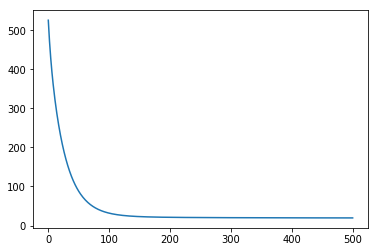

In [59]:
# Graph results

plt.plot(history)

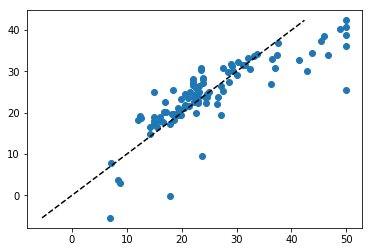

In [63]:
pred = np.array(pred)
fig, ax = plt.subplots()
ax.scatter(yTest, pred)
ax.plot( [pred.min(), pred.max()], [pred.min(), pred.max()], 'k--' )
plt.show()

In [64]:
sess.close()